## ML Case Study
- Please use Python for the following. 
- Document your steps and state any assumptions you make. A single Jupyter notebook file (.ipynb) with your approach and code is sufficient. Make sure it is commented and easy to follow. If you prefer, you can submit a text document with your analysis too. 
- The data for the case study comes from the Census Income data set in the UCI Machine Learning Repository. Your objective is to predict whether income of an individual exceeds 50K Dollar per year based on census data. 
- More importantly the objective for you is to demonstrate how you tackle a traditional supervised learning problem.

    1) Download the data from the following link http://archive.ics.uci.edu/ml/datasets/Adult into Python.
    2) Read the Attribute Information from the web page. More information can be found in the Data Set Description.
    3) Be sure to document your steps and your rationale behind each one of them. This is best done with Jupyter notebook or a word document.
    4) Predict the class variable using the given attributes. Use two supervised learning methods. Avoid over-fitting.
    5)  Assess the performance of your models using appropriate metrics. Discuss which model is best and why.
    6) Please provide an explanation in plain English of the business problem you were trying to solve and your analysis of the outcomes.  Please add any supporting visualizations to support your explanation.
    7) This is intentionally left somewhat open-ended. We want to see how you approach the problem.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [3]:
with open('adult.names') as fp:
    cols = []
    for line in fp:
        sre = re.match(r'(?P<colname>[a-z\-]+):.*\.', line)
        if sre:
            cols.append(sre.group('colname'))
    cols.append('label')

options = {'header': None, 'names': cols, 'skipinitialspace': True}

# adult.data
df = pd.read_csv('adult.data', **options)


In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Here the missing values are represented as "?" so replacing it with np.nan will make it easier to handle.

In [5]:
df = df.replace(to_replace = "?", value = np.nan) 


In [6]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
label                0
dtype: int64

In [7]:
df.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### All the missing values are present in the catagorical features so filling it with mode is the only way to handle it.

In [8]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)


In [9]:
df.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

In [10]:
# income
df.label = df.label.replace('<=50K', 0)
df.label = df.label.replace('>50K', 1)


In [11]:
df.corr(method='pearson', min_periods=1, numeric_only=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
label,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


### There is no strong corealation is found so not doing feature selection.

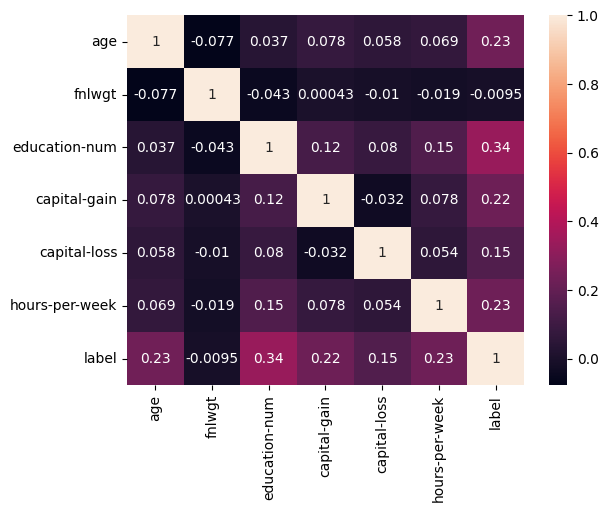

In [12]:
sns.heatmap(df.corr(method='pearson', min_periods=1, numeric_only=True), annot=True);



# Model Building


In [13]:
X= df.drop(['label'], axis=1)
y = df['label']

# Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [15]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,22,6,2671,9,12,4,0,1,4,1,25,0,39,38,0
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,38,0
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,38,0
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,38,0
4,11,3,19355,9,12,2,9,5,2,0,0,0,39,4,0


In [16]:
ss= StandardScaler().fit(df1.drop('label', axis=1))
X= ss.transform(df1.drop('label', axis=1))
y= df['label']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Gradient Boosting Classifier


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# lr = LogisticRegression()

model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
prediction = model.predict(X_test)

print("Acc on training data: {:,.3f}".format(model.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(model.score(X_test, y_test)))

Acc on training data: 0.868
Acc on test data: 0.862


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
print(confusion_matrix(y_test, prediction))


[[6978  419]
 [ 927 1445]]


# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(X_test, y_test)))

Acc on training data: 1.000
Acc on test data: 0.852


In [22]:

print(confusion_matrix(y_test, prediction1))


[[6879  518]
 [ 925 1447]]


# Scores for Gradient Boosting Classifier

In [23]:
print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7397
           1       0.78      0.61      0.68      2372

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



# Scores for Random Forest Classifier

In [24]:
print(classification_report(y_test, prediction1))


              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7397
           1       0.74      0.61      0.67      2372

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



## Explainaton:

### Business problem: 
Here the problem statement is to classify the population into to earning class which is <=50K or not. 


### Model Selection:
Here I have selected Random forest classifier here as in the requirement it was mentiond to take care of the overfitting and ensemble learning models are more robust to Overfitting problem.
